## Importing Libraries

In [1]:
import json
import requests
import numpy as np
import pandas as pd
from io import StringIO

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [3]:
#for notebooks
init_notebook_mode(connected=True)
#for offline use
cf.go_offline()

### Setup

In [2]:
#url for Account Information
url_base = 'https://api.koios.rest/api/v0/'
df = pd.read_csv('Stake_Accounts_list.csv')

In [3]:
def koios_api_pull(url, type='get', headers=None, params=None, print_text=False):
    if type == 'get':
        r = requests.get(url, headers = headers, params=params)
    elif type == 'post':
        r = requests.post(url, headers = headers, data=params)
        
    if print_text:
        print(r.text)
        
    df = pd.read_csv(StringIO(r.text), sep=',')
    return df

### Getting the Account Information

In [4]:
headers = {'Accept':'text/csv'}

In [5]:
lis = list(df['id'])
data_dic = {"_stake_addresses":lis[0:500]}
data = json.dumps(data_dic)

In [6]:
url = url_base + 'account_info'
acc_info = koios_api_pull(url, type='post' , headers= headers , params = data)



In [7]:
acc_info['Index']=acc_info.index
acc_info

,stake_address,status,delegated_pool,total_balance,utxo,rewards,withdrawals,rewards_available,reserves,treasury,Index
0,stake178t6x30tat2zyp75xgtk8jqh9p5cgvj5eqwsql06...,not registered,NaN,1500000,1500000,0,0,0,0,0,0
1,stake179w99fuethkx3s9z52har0g7dcz9prfcz6ptxh3l...,not registered,NaN,235042364,235042364,0,0,0,0,0,1
2,stake17x64m8gpwxklrf5z4tdpyuzrfqp04yfe39kz6kry...,not registered,NaN,1500000,1500000,0,0,0,0,0,2
3,stake17935ex05y7082ng6d7r94nx2tpm52fyf295v78ap...,not registered,NaN,1500000,1500000,0,0,0,0,0,3
4,stake178ffychfh9aln5n837ehy4y2kstvz22vke0pl0kk...,not registered,NaN,1500000,1500000,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
495,stake1782dpzrh8f8s809dkwxeacww05pe5h42dxxhhlwj...,not registered,NaN,3202490,3202490,0,0,0,0,0,495
496,stake179d6kqnu854g67ejkre7hxzzeuv5t08a4mryywxc...,not registered,NaN,3202490,3202490,0,0,0,0,0,496
497,stake17964thgh8upnkwv4cewkm9w9kwc2zztmuu3qj56r...,not registered,NaN,3202490,3202490,0,0,0,0,0,497
498,stake17xj62lufz8se8rlr7r79ap7rwa845f4gnvm6qls8...,not registered,NaN,4011228007,4011228007,0,0,0,0,0,498


In [10]:
acc_info.to_csv('Account_Information.csv',index=False)

### Preparing data for visualisation

In [11]:
acc = acc_info[['Index','stake_address','total_balance']].copy()
acc = acc[acc['total_balance']>0]

In [12]:
acc.nlargest(2,['total_balance'])

,Index,stake_address,total_balance
176,176,stake1u844au4xu2gfaheearyu0qyhg35sxa40e3gu5pl0...,3264243501651
448,448,stake1u8wljgnnly9j3gkh6nenrx5exua2mn0775rsxmtg...,2700756651566


In [13]:
acc.nsmallest(2,['total_balance'])

,Index,stake_address,total_balance
239,239,stake1u9hlfxyv3xear7302weuwnqt27fat4fxyp43v7sn...,2
20,20,stake1uxglx5pg0y49td9djar0yts7z8xu9q70dwdahf4l...,10


In [14]:
acc['Total USD'] = acc['total_balance']/1000000*0.37

In [15]:
acc

,Index,stake_address,total_balance,Total USD
2,2,stake1uxs70hw759k87fptvajc2w7erzq4pkq9u9gjf9g4...,12576287686,4653.226444
4,4,stake1u85jzzcp0dyl3xxqpjy5x7fqyadg9r2aq2r6lhhq...,60100460089,22237.170233
6,6,stake1uyxa895nulwuqe9m75g8ggqeu2a25dl4drh7mruj...,2262654574,837.182192
8,8,stake1u8r9vvpvew8fkw3lzfq2ezk38xwpcktf8g6z6fml...,145225206,53.733326
10,10,stake1uydzg05hgy3vp6evchsxej7cz2le3h5jmq920qg9...,6531113,2.416512
...,...,...,...,...
489,489,stake1uygcvz9qykvm98zeaaa5ltz02u9tuj9h6m7azxpu...,3816676294,1412.170229
491,491,stake1uxcj7cvdkr83h4hvdda6k920dnjewg7vzc0s7x4y...,852770150,315.524955
494,494,stake1ux85zm0zdsnhzcqgkqht8dhz8ef0zuf7g4xyvqha...,101720116,37.636443
495,495,stake1ux5xs224z7haz2z833x2mqs4r3megzyfmrkgzeeg...,1724961,0.638236


In [16]:
acc.nlargest(2,['total_balance'])

,Index,stake_address,total_balance,Total USD
176,176,stake1u844au4xu2gfaheearyu0qyhg35sxa40e3gu5pl0...,3264243501651,1.207770e+06
448,448,stake1u8wljgnnly9j3gkh6nenrx5exua2mn0775rsxmtg...,2700756651566,9.992800e+05


In [17]:
acc.nsmallest(2,['total_balance'])

,Index,stake_address,total_balance,Total USD
239,239,stake1u9hlfxyv3xear7302weuwnqt27fat4fxyp43v7sn...,2,7.400000e-07
20,20,stake1uxglx5pg0y49td9djar0yts7z8xu9q70dwdahf4l...,10,3.700000e-06


In [18]:
acc.nlargest(2,['Total USD'])

,Index,stake_address,total_balance,Total USD
176,176,stake1u844au4xu2gfaheearyu0qyhg35sxa40e3gu5pl0...,3264243501651,1.207770e+06
448,448,stake1u8wljgnnly9j3gkh6nenrx5exua2mn0775rsxmtg...,2700756651566,9.992800e+05


In [19]:
acc.nsmallest(2,['Total USD'])

,Index,stake_address,total_balance,Total USD
239,239,stake1u9hlfxyv3xear7302weuwnqt27fat4fxyp43v7sn...,2,7.400000e-07
20,20,stake1uxglx5pg0y49td9djar0yts7z8xu9q70dwdahf4l...,10,3.700000e-06


### Visualising the Data

Text(0.5, 0, 'Stake Accounts')

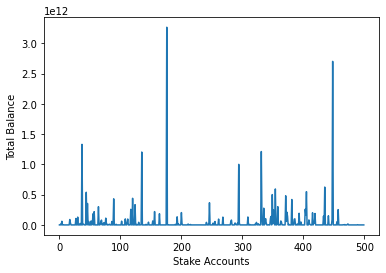

In [20]:
plt.plot(acc_info['Index'],acc_info['total_balance'])
plt.ylabel('Total Balance')
plt.xlabel('Stake Accounts')

Text(0.5, 0, 'Stake Accounts')

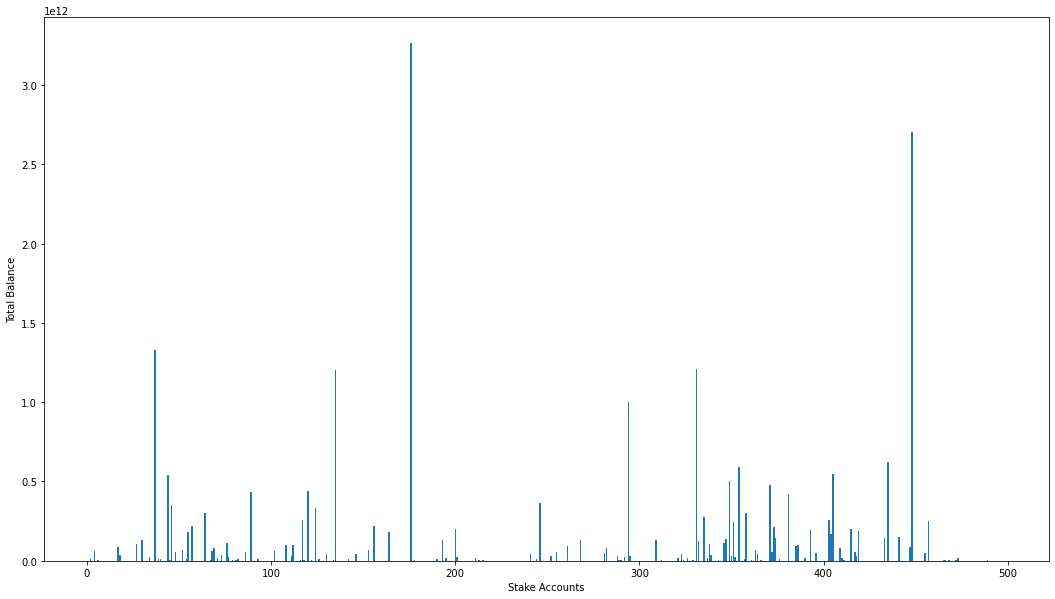

In [21]:
plt.figure(figsize=(18,10))
plt.bar(acc['Index'],acc['total_balance'])
plt.ylabel('Total Balance')
plt.xlabel('Stake Accounts')

In [22]:
fig = acc.iplot(kind='bar')

Text(0.5, 0, 'Stake Accounts-Index')

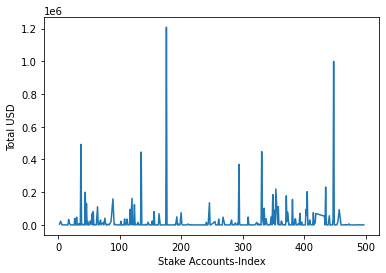

In [23]:
plt.plot(acc['Index'],acc['Total USD'])
plt.ylabel('Total USD')
plt.xlabel('Stake Accounts-Index')

Text(0.5, 0, 'Stake Accounts')

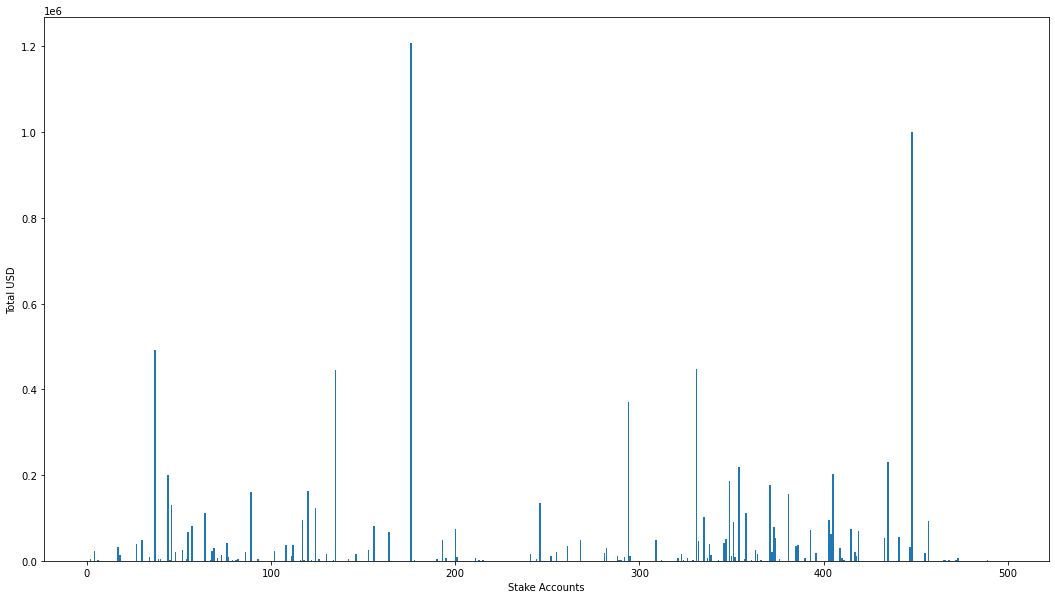

In [24]:
plt.figure(figsize=(18,10))
plt.bar(acc['Index'],acc['Total USD'])
plt.ylabel('Total USD')
plt.xlabel('Stake Accounts')

In [25]:
fig = acc['Total USD'].iplot(kind='bar')